# Hands On Astropy Tutorial 
**Tutors:** Léa Jouvin

This hands-on tutorial gives an introduction and overview of the [Astropy](http://www.astropy.org/) Python package for Astronomy and was done by Axel Donath that gave the [online course last year](https://escape2020.github.io/school2021/posts/clase16/).

## Preface
We recommend to follow this tutorial by **executing the code cells on your local machine**, along with the tutor. Every sub-topic we will cover in this tutorial will be concluded by a few **exercises with different levels of difficulty** (*easy*, *advanced* and *hard*). The exercises will not be discussed during the course, however we provide a **sample solution** for all exercises in the **solutions folder** you can look at **after the course** and load them directly in the notebook. You can always ask for help on the exercises on the correspoding Slack channel **#d05-fri11-astropy**.   

The estimated time for this tutorial is ~1.5 hours. We have marked some of the sections that deal with more advanced topics as "optional". 

We're happy to receive any **feedback or questions** on the tutorial via mail to *lea.jouvin@cea.fr* or using the 
repository's [issue tracker](https://github.com/escape2020/school2022/issues). 

## What is Astropy?

![](astropy_banner_96.png)

    "The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages."


The concept and structure of the package is decribed in more detail in the first [Astropy paper 2013](http://adsabs.harvard.edu/abs/2013A%26A...558A..33A). The development infrastructure
and status of the v2.0 core package is described in the second [Astropy paper 2018](http://adsabs.harvard.edu/abs/2018AJ....156..123A).

The **Astropy package is structured into several submodules** and we will cover (what we consider) the most important of them in the following order:

1. [astropy.units](http://docs.astropy.org/en/stable/units/index.html) and in particular [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html) to do astronomical calculations with units.

2. [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) and in particular the classes [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) and [Angle](http://docs.astropy.org/en/stable/coordinates/angles.html) to handle astronomical sky positions, coordinate systems and coordinate transformations.

3. [astropy.tables](http://docs.astropy.org/en/stable/table/index.html) and the [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) class to handle astronomical data tables.

4. [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) to open and write data files in [FITS format](https://fits.gsfc.nasa.gov/fits_documentation.html).

5. (optional) Plotting of astronomical sky images with [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/)

In addition to the Astropy core package there is an infrastructure of  [Astropy affiliated packages](http://www.astropy.org/affiliated/) dedicated to specific fields of Astronomy or analysis tasks, such as:

- [Astroplan](https://astroplan.readthedocs.io/en/latest/): observation planning
- [Reproject](http://reproject.readthedocs.io/en/stable/): reprojection of sky images
- [Regions](http://astropy-regions.readthedocs.io/en/latest/): handling of sky regions 
- [Photutils](https://photutils.readthedocs.io/en/stable/): source detection and photometry
- [Gammapy](docs.gammapy.org): gamma-ray Astronomy data analysis
- ...and many others, or maybe your package?


## Other Ressources

There are other ressources with Astropy tutorials, we can recommend:

- [Learn.Astropy](http://learn.astropy.org) webpage with a lot of tutorial material.
- [Astropy documentation](http://docs.astropy.org) webpage, with lots of small usage examples.
- [Astropy Tutorials](https://github.com/astropy/astropy-tutorials) repository (same as linked on Learn.Astropy)
- [Astropy workshop](https://github.com/astropy/astropy-workshop) held the AAS meeting 2019. 
- [STAK project](https://stak-notebooks.readthedocs.io/en/latest/) provided by STSci, with tutorial notebooks for typical IRAF analysis tasks. 
- [Webinar on Youtube](https://www.youtube.com/watch?v=YP42k3J08_o&list=PL7kL5D8ITGyV7zeT-oADweFKHsZNh3tKV) provided by Astronomy Data and Computing Services (ADACS). 

As the content that can be covered in this ~1.5 hour tutorial is very limited, we recommend to also **check-out the ressources** listed above after the school.

See https://www.astropy.org/help.html for list of references how to **get help on Astropy**.

If you would like to contribute to Astropy, please start by reading the [contribute page](http://www.astropy.org/contribute.html)
on the website.

Let's start with the setup and check of the notebook:

## 0. Setup

Check package versions. All examples should work with Astropy > 2.0 and Numpy > 1.11

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.22.4
astropy: 5.1


## 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 

### 1.1. Basics
The recommended way to import the `astropy.units` submodule is: 

In [3]:
from astropy import units as u

`Quantities` are created by multiplying any number with a unit object:

In [4]:
distance = 1. * u.lightyear
print(distance)

1.0 lyr


Or by passing a string to the general `Quantity` object:

In [5]:
distance = u.Quantity('1 lyr')

Check the availabe units with tab completion on the units module, `u.<TAB>`.

Quantities can be also created using lists and arrays:

In [6]:
distances = [1, 3, 10] * u.lightyear
print(distances)

distances = np.array([1, 3, 10]) * u.lightyear
print(distances)

[ 1.  3. 10.] lyr
[ 1.  3. 10.] lyr


In [7]:
distances.value

array([ 1.,  3., 10.])

The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [8]:
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [9]:
distances.unit

Unit("lyr")

In [10]:
type(distances.unit)

astropy.units.core.Unit

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

In [11]:
distances * 10

<Quantity [ 10.,  30., 100.] lyr>

Many numpy functions will work as expected and return again a `Quantity` object:

In [12]:
np.max(distances)

<Quantity 10. lyr>

In [13]:
np.mean(distances)

<Quantity 4.66666667 lyr>

But there are exceptions, where the unit handling is not well defined, e.g. in `np.log` arguments have to be dimensionless, such as:

In [14]:
#np.log(30 * u.MeV) # Will raise an UnitConversionError
np.log(30 * u.MeV / (1 * u.MeV))

<Quantity 3.40119738>

Probably the most useful method on the `Quantity` object is the `.to()` method which allows to convert a quantity to different units:

In [15]:
distance.to('meter')

<Quantity 9.46073047e+15 m>

In [16]:
distance.to(u.parsec)

<Quantity 0.30660139 pc>

Quantities can be combined with any arithmetical expression to derive other quantities, `astropy.units` will propagate
the units correctly:

In [17]:
speed_of_light = distance / u.year
print(speed_of_light)
print(speed_of_light.to('km/s'))

1.0 lyr / yr
299792.458 km / s


In [18]:
print(speed_of_light.to('angstrom/day'))

2.5902068371199996e+23 Angstrom / d


The most practical way to work with units is: define the input quantities with units, do the computation and forget about the units, convert the final result to the desired units. In most cases there is no need for intermediate unit conversions.

For standardized unit systems such as `'si'` or `'cgs'` there are convenience attributes on the quantity object:

In [19]:
speed_of_light.si

<Quantity 2.99792458e+08 m / s>

In [20]:
speed_of_light.cgs

<Quantity 2.99792458e+10 cm / s>

### 1.2. Equivalencies

In Astronomy and other fields of physics quantities are often measured in more practical units, which are equivalent to the actual physical unit. In `astropy.units` this is handled with the concept of "equivalencies".  

For example consider units to measure spectral quantities such as wavelength, frequency and energy:

In [21]:
frequency = 3e20 * u.hertz
frequency.to('MeV', equivalencies=u.spectral())

<Quantity 1.24070031 MeV>

In [22]:
frequency.to('picometer', equivalencies=u.spectral())

<Quantity 0.99930819 pm>

Or for converting temperatures:

In [23]:
temperature = 25 * u.Celsius

In [24]:
temperature.to("Kelvin", equivalencies=u.temperature())

<Quantity 298.15 K>

For some parallel units like degrees for temperature (Celsus, fahrenheit)

In [25]:
with u.imperial.enable():
    print(temperature.to("deg_F", equivalencies=u.temperature()))

77.0 deg_F


### 1.3 Miscellaneous

Astropy provides a lot of builtin physical and astronomical constants quantitites in the [astropy.constants](https://docs.astropy.org/en/stable/constants/index.html) submodule:

In [26]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


Here is a [list of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

If you write a function you can make sure the input is given in the right units using the [astropy.units.quantity_input](http://docs.astropy.org/en/stable/api/astropy.units.quantity_input.html#astropy.units.quantity_input) decorator: 

In [27]:
@u.quantity_input(frequency=u.hertz, temperature=u.K)
def blackbody(frequency, temperature): 
    pre_factor = 2 * (const.h * frequency ** 3) / const.c ** 2
    exponential_factor = 1. / (np.exp((const.h * frequency) / (const.k_B * temperature)) - 1)
    return pre_factor * exponential_factor

### 1.4 Interfacing quantities with third-party code

When writing code that uses quantities we are typically bound to use it everywhere in the code. But often we'd like to interface with functions (e.g. from [SciPy](https://www.scipy.org/) or [Matplotlib](https://matplotlib.org/)) or other third-party code that doesn't know how to handle quantities.

For Matplotlib, Astropy has a builtin support using the [quantity_support()](http://docs.astropy.org/en/stable/api/astropy.visualization.quantity_support.html) context manager:

/data01/homes/dipiano/.conda/envs/eschool2022/lib/python3.10/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


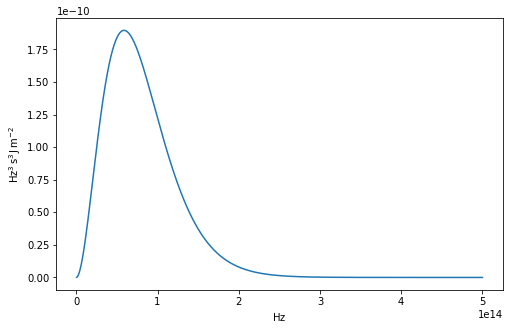

In [28]:
from astropy.visualization import quantity_support

plt.figure(figsize=(8, 5))

temperature = 1000 * u.K
frequencies = np.linspace(1E-5, 0.5e15, 1000) * u.hertz

radiance = blackbody(frequency=frequencies, temperature=temperature)

with quantity_support():   
    plt.plot(frequencies, radiance)

But in other cases there is only the option to convert the quantity to well defined units, strip off the unit and re-attach it after the computation:

In [29]:
emin, emax = [1, 10] * u.TeV
energies = np.logspace(np.log10(emin.value), np.log10(emax.value), 10) * emin.unit
print(energies)

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] TeV


    However the alternative implementation based on `np.geomspace` (very similar to numpy linspace), just works as expected:

In [30]:
energies = np.geomspace(emin, emax, 10)
print(energies)

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] TeV


### 1.5 Performance Tips

As the main data structure of the Quantity is a standard numpy array, they are suitable for computations with large arrays. Still you have to take care of a few pitfalls.

When creating a Quantity with `data * u.km` or `data * u.Unit()` by default a copy of the data is made:

In [31]:
values = np.ones((500, 500, 500))

In [32]:
%%timeit
quantity = values * u.kpc

412 ms ± 35.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


If you would like to avoid the copy you can use:

In [33]:
%%timeit
quantity = u.Quantity(values, unit="kpc", copy=False)

4.89 µs ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In Astropy > 3.1 a new operator was introduced to achieve the same behaviour (you associate an astropy units to an existing value but you don't create a new Quantity object):

In [34]:
%%timeit
quantity = values << u.Unit("kpc")

6.92 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


To avoid copies when converting to different units and getting the values, you can use *to_value* instead of using`quantity.to("m").value`.

In [35]:
quantity = u.Quantity(values, unit="kpc", copy=False)
values = quantity.to_value("m")

More details can be found on http://docs.astropy.org/en/stable/units/index.html#performance-tips.

### 1.6 Exercises

- (*easy*) How long does the light travel from the sun to the earth in minutes? How long does the light travel from the Galactic center (assume a distance of 8 kpc) in years? 

In [47]:
d = 1 * u.au
(d.to('cm') / const.c.cgs).to('min')

<Quantity 8.3167464 min>

In [43]:
d = 8 << u.Unit('kpc')
(d.to('cm') / const.c.cgs).to('year')

<Quantity 26092.51021734 yr>

In [45]:
# %load solutions/solution_light_travel.py

- (*advanced*) Define a new unit called `"baro-meter"`, which is eqivalent to 25 cm and use it to measure the height of the empire state building (assume a height of 381 meters). Please read the [Astropy documentation on combining and defining units](http://docs.astropy.org/en/stable/units/combining_and_defining.html) for an example how to do this (For other ways to measure the height of a building using a barometer see [barometer question on Wikipedia](https://en.wikipedia.org/wiki/Barometer_question)...)

In [49]:
barom = u.def_unit('baro-meter', 25 * u.m)
h = 381 * u.m
h.to(barom)

<Quantity 15.24 baro-meter>

In [50]:
# %load solutions/solution_baro_meter.py

- (*expert*) Find the frequency with the maximum photon rate of the black body spectrum $\mathcal{B}(\nu, T)$ with temperature $T=5000~\mathrm{K}$. For this you can use a numerical optimization routine such as [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).
As the frequency as well as the radiance can cover many orders of magnitude, the stability of the algorithm can be much improved by minimizing the (negative) logarithm of the radiance $-\log{\mathcal{B}}$ as well as minimizing with respect to the logarithm of the frequency by introducing the variable $x = \log{\nu}$. Define a new function based on this x variable and use scipy.optimize to minimize it.

Finally compare the result against the analytical solution from [Wien's displacement law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law). 

In [51]:
# %load solutions/solution_black_body.py
# flake8: noqa

## 2. Coordinates

With the submodule [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) Astropy provides a framework to handle sky positions in various coordinate systems and transformations between them.


### 2.1 Basics
The basic class to handle sky coordinates is [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html):

In [52]:
from astropy.coordinates import SkyCoord

It can be created by passing a position angle for longitude and latitude and a keyword specifying a coordinate frame:

In [53]:
position_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63, 22.01)>


As for `Quantities` the instanciation with `lists`, `arrays` or even `Quantities` also works:

In [54]:
positions = SkyCoord([345., 234.3] * u.deg,  [-0.1, 0.2] * u.deg, frame='galactic')

Alternatively the angles can be specified as string:

In [55]:
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')

# or

position_crab = SkyCoord('5:34:31.97', '22:0:52.10',
                         unit=(u.hour, u.deg), frame='icrs')

Where in the first case the unit doesn't have to specified because it is encoded in the string via `'hms'` and `'dms'`.

A very convenient way to get the coordinates of an individual object is qerying the [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) database with `SkyCoord.from_name()`:

In [56]:
SkyCoord.from_name('Crab')

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63333333, 22.01333333)>

To transform the coordinates to a different coordinate system we can use `SkyCoord.transform_to()`:

In [57]:
pos_gal = position_crab.transform_to('galactic')

For convenience we can also directly use the `.galactic` or `.icrs` attributes:

In [58]:
position_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    (184.55754381, -5.78427369)>

In [59]:
position_crab.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

To access the `longitude` and `latitude` angles individually: 

In [60]:
position_crab.data.lon

<Longitude 5.57554722 hourangle>

In [61]:
position_crab.data.lat

<Latitude 22.01447222 deg>

### 2.2 Measuring distances between positions in the sky
The angular distance between two [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) objects, can be found using the [SkyCoord.separation()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.separation) method:

In [62]:
#position_saga = SkyCoord.from_name('Sag A*')
position_saga = SkyCoord(0 * u.deg, 0 * u.deg, frame='galactic')

separation=position_crab.separation(position_saga)
separation

<Angle 172.64076197 deg>

Sometimes the "inverse" operation is also useful: compute a new position based on a given offset and position angle:

In [63]:
position_crab.directional_offset_by(
    separation=1 * u.deg, position_angle=0 * u.deg
)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 23.01447222)>

### 2.3 ALT - AZ coordinates (optional)

In various cirumstances, e.g. for planning observations, it can be usefull to transform a sky coordinate into a position in the horizontal coordinate system given a location on earth and a time

In [64]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

We define a location using [EarthLocation](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html):

In [65]:
paris = EarthLocation(lat=48.8567 * u.deg, lon=2.3508 * u.deg)
print(paris.geodetic)

GeodeticLocation(lon=<Longitude 2.3508 deg>, lat=<Latitude 48.8567 deg>, height=<Quantity 7.2605446e-10 m>)


And a time using the [Time](http://docs.astropy.org/en/stable/api/astropy.time.Time.html) object:

In [66]:
now = Time.now()
print(now)

2022-06-22 14:50:57.527439


Now we can define a horizontal coordinate system using the [AltAz]([docs.astropy.org/en/stable/api/astropy.coordinates.AltAz.html) class and use it to convert from the sky coordinate:

In [67]:
altaz = AltAz(obstime=now, location=paris)
crab_altaz = position_crab.transform_to(altaz)
print(crab_altaz)

<SkyCoord (AltAz: obstime=2022-06-22 14:50:57.527439, location=(4200910.64325784, 172456.78503911, 4780088.65877593) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (255.84282021, 41.21011174)>


### 2.4 Exercises

(*easy*) Define the sky coordinate for your favorite astronomical object and find the angular distance to the Crab Nebula as well as the Galactic center.


In [74]:
crab = SkyCoord.from_name('crab')
m42 = SkyCoord.from_name('m42')
crab, m42

crab.separation(m42).deg

27.405067894292777

In [ ]:
# %load solutions/solution_skycoord_easy.py

(*expert*) Make a plot of the height above horizon vs.time for the crab position at the location of Annecy. Mark the time range where it is visible. Would the Crab Nebula be visible tonight?

We give the following for Annecy location: lat=45.8058° and lon=6.5726°

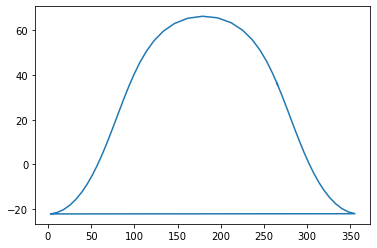

In [82]:
from astropy.coordinates import AltAz, EarthLocation

annecy = EarthLocation.from_geodetic(lat=45.8058, lon=6.5726)
hours = np.linspace(0, 1, 48) * u.d

time = Time.now() + hours
altaz = crab.transform_to(AltAz(obstime=time, location=annecy))

plt.plot(altaz.az, altaz.alt)

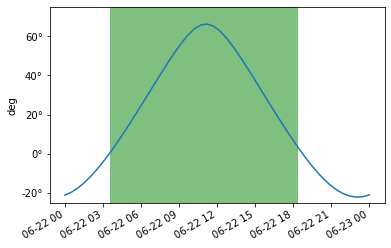

In [84]:
# %load solutions/solution_crab_visible.py
# flake8: noqa

# Define coordinate
coord_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')

# Set location
annecy = EarthLocation(lat=45.8058 * u.deg, lon=6.5726 * u.deg)

# Define array of times (30 minute intervals)
time_intervals = np.linspace(0 * u.day, 1 *u.day, 48)

time_start = Time('2022-06-22 00:00:00')
times = Time(time_start + time_intervals)

# Get AltAz coordinates
altaz = AltAz(obstime=times, location=annecy)
crab_altaz = coord_crab.transform_to(altaz)

# Get altitude over horizon
altitudes = crab_altaz.alt.to('deg')

# Get times when altitude > 0
above_horizon = altitudes > 0 * u.deg

with quantity_support():
    plt.plot_date(times.plot_date, altitudes, fmt='-')

    # orient date labels at a slant
    plt.gcf().autofmt_xdate()

    alt_min, alt_max = -25 * u.deg, 75 * u.deg
    plt.fill_between(times.plot_date,
                     alt_min, alt_max,
                     where=above_horizon,
                     facecolor='green',
                     alpha=0.5)
    plt.ylim(alt_min, alt_max)


## 3. Tables

Astropy provides the [Table](http://docs.astropy.org/en/stable/api/astropy.io.votable.tree.Table.html) class in order to handle data tables.

### 3.1 Basics

Table objects can be created as shown in the following

In [85]:
from astropy.table import Table

In [86]:
table = Table()

We add columns to the table like we would add entries to a dictionary

In [87]:
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A', 'Vela Junior']
table['GLON'] = [184.5575438, 0, 111.74169477, 266.25914205] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151, -1.21985818] * u.deg
table['Source_Class'] = ['pwn', 'unc', 'snr', 'snr']

By executing the following cell, we get a nicely formatted version of the table printed in the notebook:

In [88]:
table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


### 3.2 Accessing rows and columns

We have access to the defined columns. To check which ones are availbe you can use `Table.colnames`:

In [89]:
table.colnames

['Source_Name', 'GLON', 'GLAT', 'Source_Class']

And access individual columns just by their name:

In [90]:
table['GLON']

184.5575438
0.0
111.74169477
266.25914205


And also a subset of columns:

In [91]:
table[['Source_Name', 'GLON']]

Source_Name,GLON
,deg
str11,float64
Crab,184.5575438
Sag A*,0.0
Cas A,111.74169477
Vela Junior,266.25914205


Often, it is handy to get the column data as [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity) using the `.quantity` property:

In [92]:
table['GLON'].quantity

<Quantity [184.5575438 ,   0.        , 111.74169477, 266.25914205] deg>

Rows can be accessed using numpy indexing:

In [93]:
table[0:2]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc


Or by using a boolean mask (boolean numpy array) for indexing:

In [94]:
selection = table['Source_Name'] == 'Crab'
table[selection]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn


### 3.3 Reading / Writing tables to disk
Astropy tables can be serialized into many formats. For an overview see [here](http://docs.astropy.org/en/latest/io/unified.html#built-in-table-readers-writers). To write the table in FITS format we can use:

In [95]:
table.write('data/example.fits', overwrite=True, format='fits')

In [96]:
Table.read('data/example.fits')

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


In [97]:
table.write('data/example.ecsv', overwrite=True, format='ascii.ecsv')

In [98]:
!cat data/example.ecsv

# %ECSV 1.0
# ---
# datatype:
# - {name: Source_Name, datatype: string}
# - {name: GLON, unit: deg, datatype: float64}
# - {name: GLAT, unit: deg, datatype: float64}
# - {name: Source_Class, datatype: string}
# schema: astropy-2.0
Source_Name GLON GLAT Source_Class
Crab 184.5575438 -5.78427369 pwn
"Sag A*" 0.0 0.0 unc
"Cas A" 111.74169477 -2.13544151 snr
"Vela Junior" 266.25914205 -1.21985818 snr


### 3.4 Indexing and Grouping

The `Table` object implements and `.add_index()` method (You can find more details [here](http://docs.astropy.org/en/stable/table/indexing.html), but not covered in this tutorial.), that allows to define an "index column" to access rows by the value contained in the index column:

In [99]:
table.add_index(colnames="Source_Name")

Using the defined index column the row can now be accessed in a "Pandas" style, using the `.loc[]` syntax:

In [100]:
table.loc["Cas A"]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Cas A,111.74169477,-2.13544151,snr


This works for mutiple keys as well:

In [101]:
table.loc[["Cas A", "Crab"]]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Cas A,111.74169477,-2.13544151,snr
Crab,184.5575438,-5.78427369,pwn


Astropy's table object also supports the possiblity to group the rows by a given key column. The groups will be defined by the unique values contained in the column defined as key:

In [102]:
table_grouped = table.group_by("Source_Class")

for group in table_grouped.groups:
    print(group, "\n")

Source_Name     GLON        GLAT    Source_Class
                deg         deg                 
----------- ----------- ----------- ------------
       Crab 184.5575438 -5.78427369          pwn 

Source_Name     GLON         GLAT    Source_Class
                deg          deg                 
----------- ------------ ----------- ------------
      Cas A 111.74169477 -2.13544151          snr
Vela Junior 266.25914205 -1.21985818          snr 

Source_Name GLON GLAT Source_Class
            deg  deg              
----------- ---- ---- ------------
     Sag A*  0.0  0.0          unc 



Where each `group` is again a `Table` object:

In [103]:
type(group)

astropy.table.table.Table

### 3.5. Join and stack tables (Optional)
astropy.table provides convenient methods to join, and horizontally/vertically stack tables.

#### Vertically stack tables

In [104]:
from astropy.table import vstack
table_1=table_grouped.groups[0]
table_2=table_grouped.groups[1]

In [105]:
table_1

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn


In [106]:
table_2

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


In [107]:
vstack_table=vstack([table_1, table_2])
vstack_table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


#### Horizontally stack tables

In [108]:
from astropy.table import hstack
table=Table.read('data/example.fits')
table_1=table[0:2]
table_2 = Table({'EXTRA_INFO': ["Amazing", "Beautiful"]})

In [109]:
table_1

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc


In [110]:
table_2

EXTRA_INFO
str9
Amazing
Beautiful


In [111]:
hstack_table=hstack([table_1, table_2], join_type="outer")
hstack_table

Source_Name,GLON,GLAT,Source_Class,EXTRA_INFO
,deg,deg,,
bytes11,float64,float64,bytes3,str9
Crab,184.5575438,-5.78427369,pwn,Amazing
Sag A*,0.0,0.0,unc,Beautiful


#### Join tables

In [112]:
from astropy.table import join
table=Table.read('data/example.fits')
table_1=table[0:2]
table_2=table[1:4]

In [113]:
table_1

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc


In [114]:
table_2

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


In [124]:
# join is actually intersection, very misleading
join_table=join(table_1, table_2)
join_table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Cas A,111.74169477,-2.13544151,snr


### 3.6. Miscellaneous

These are a few other useful operations when working with Astropy tables.

Sort by key:

In [125]:
table.sort('GLON')

In [126]:
table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Cas A,111.74169477,-2.13544151,snr
Crab,184.5575438,-5.78427369,pwn
Vela Junior,266.25914205,-1.21985818,snr


Note that `.sort()` is an in place operation on the table, i.e. changes the actual table.

To remove a specific row by index:

In [127]:
table.remove_row(0)

Astropy tables also support row-wise iteration in Python loops:

In [128]:
for row in table:
    print(row['Source_Name'])

Crab
Vela Junior


Another useful feature for quickly inspecting the data contained in the table is the `.show_in_browser()` method:

In [129]:
table.show_in_browser(jsviewer=True)

ERROR: Browser 'default' not found. [astropy.table.table]


### 3.7 Exercises

- (*easy*) Add columns with the `RA` and `DEC` coordinates of the objects to the example table.

In [174]:
ra, dec = [], []
for source in table['Source_Name']:
    ra.append(SkyCoord.from_name(source).ra.deg)
    dec.append(SkyCoord.from_name(source).dec.deg)
ra, dec

([83.63333333, 133.0], [22.01333333, -46.333])

In [ ]:
# %load solutions/solution_add_radec_columns_table.py
# flake8: noqa
# Get example table

table = Table()
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A']
table['GLON'] = [184.55754381, 0, 111.74169477] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151] * u.deg

# Create SkyCoord object holding all 3 sky coordinates
coords = SkyCoord(table['GLON'], table['GLAT'], frame='galactic')

# Add new columns
table['RA'] = coords.icrs.ra
table['DEC'] = coords.icrs.dec

table

- (*advanced *) Load the Fermi 2FHL catalog table (`'data/fermi_2fhl_catalog.fits'`) and find the brighest source (the brightness value is stored in the `'Flux50'` column). What is the common name of the source (column `'ASSOC'`)?
Find all sources within 10 deg from the position of this source.

In [ ]:
# %load solutions/solution_fermi_2fhl.py
# flake8: noqa
# Read table
fermi_2fhl = Table.read('data/fermi_2fhl_catalog.fits', hdu=1)

# Sort by brightness
fermi_2fhl.sort('Flux50')

# With -1 we get the last element
print('The brightest source in the catalog is: {} \n'.format(fermi_2fhl[-1]['ASSOC']))

# you can also use argmax
#index_brightest_source=fermi_2fhl['Flux50'].argmax()
#brighest_source = fermi_2fhl['ASSOC'][index_brightest_source]
#print('The brightest source in the catalog is: {} \n'.format(brighest_source[0]))


# Define SkyCoord for all objects in the table
coords = SkyCoord(fermi_2fhl['GLON'], fermi_2fhl['GLAT'], frame='galactic')

# Get Crab position
coord_crab = coords[fermi_2fhl["ASSOC"] == "Crab"]

# Find rows where separation < 1 deg
separation = coord_crab.separation(coords)

# Print result
max_separation = 10 * u.deg
fermi_2fhl[separation < max_separation]

- (*expert*) Make an allsky plot (using an 'Aitoff' projection) of all the sources in the Fermi 2FHL catalog grouped by source class (i.e. choose a different marker color for every source class). The class of the sources is stored in the `'CLASS'` column. There are a few possible ways to identify the groups of source class. One of them is to use [Table.group_by()](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.group_by) followed by a loop over the groups (check Astropy documentation!) another way is to use a regular Python `set` to idenfity the unique entries in the `'CLASS'` column and loop over those. You can use `plt.subplot(projection='aitoff')` to instanciate a matplotlib axes with `'Aitoff'` projection. Note that the `'Aitoff'` projection requires angular positions measured in radians.

In [ ]:
# %load solutions/solution_all_sky_plot.py
# flake8: noqa
from astropy.coordinates import Angle

source_classes = set(fermi_2fhl['CLASS'])

print('Source classes: {}'.format(source_classes))

plt.figure(figsize=(12, 5))
ax = plt.subplot(projection='aitoff')

glon = Angle(fermi_2fhl['GLON'].quantity)
glon = glon.wrap_at('180d')

glat = Angle(fermi_2fhl['GLAT'].quantity)

with quantity_support():
    for source_class in sorted(source_classes):
        selection = fermi_2fhl['CLASS'] == source_class
        ax.scatter(glon[selection].rad, glat[selection].rad, label=source_class)
    ax.grid()
    plt.legend(bbox_to_anchor=(1.15, 1), loc=1)

## 4. FITS Images and WCS

The [flexible image transport system](https://fits.gsfc.nasa.gov/fits_documentation.html) format (FITS) is widely used data format for astronomical images and tables. As example we will use image data of the supernova remnant [Cassiopeia A](https://en.wikipedia.org/wiki/Cassiopeia_A), taken by the [Chandra X-ray observatory](http://chandra.harvard.edu/).

### 4.1 Basics


In [152]:
from astropy.io import fits

To open the fits file we use `fits.open()` and just specify the filename as an argument:

In [153]:
hdulist = fits.open('data/casa_0.5-1.5keV.fits.gz')

You get a hdu list that is the list of header data unit stored in the fits file.

We can retrieve some basic information on the  header data unit (HDU) by calling `.info()`:

In [154]:
hdulist.info()

Filename: data/casa_0.5-1.5keV.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   (1024, 1024)   float32   


It contains only one `PrimaryHDU` with data dimensions `(1024, 1024)` of format `float32`. 

To access the hdu we use:

In [155]:
image_hdu = hdulist['PRIMARY'] 

#or

image_hdu = hdulist[0] 

We can access the data with the `.data` attribute:

In [156]:
image_hdu.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

It is a plain 2d numpy array. 

We use `plt.imshow()` to visualize it:

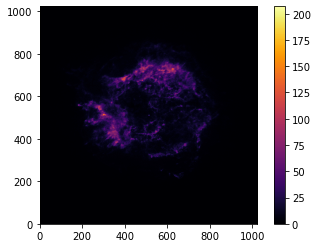

In [157]:
plt.imshow(image_hdu.data, origin='lower', cmap='inferno')
plt.colorbar()

Additional meta information is stored in the `.header` attribute:

In [158]:
image_hdu.header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1024 / Axis Length                                    
NAXIS2  =                 1024 / Axis Length                                    
OBJECT  = 'Cassiopeia A'                                                        
DATE-OBS= '2007-12-05T22:01:59'                                                 
DATE-END= '2007-12-08T20:07:24'                                                 
LTM1_1  =                    1                                                  
LTM1_2  =                    0                                                  
LTM2_1  =                    0                                                  
LTM2_2  =                    1                                                  
LTV1    =                -36

We now use the header information to create a world coordinate to pixel coordinate transformation, using the [astropy.wcs.WCS](http://docs.astropy.org/en/stable/api/astropy.wcs.WCS.html#astropy.wcs.WCS) class.

astropy.wcs contains utilities for managing World Coordinate System (WCS) transformations defined in several elaborate [FITS WCS standard conventions](https://fits.gsfc.nasa.gov/fits_wcs.html). These transformations work both forward (from pixel to world) and backward (from world to pixel).

In [159]:
from astropy.wcs import WCS

In [160]:
wcs = WCS(image_hdu.header)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 350.8841248  58.78133011  
CRPIX : 445.5  289.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001366666693  0.0001366666693  
NAXIS : 1024  1024


Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


Using the helper methods [SkyCoord.to_pixel()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.to_pixel) and [SkyCood.from_pixel()](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.from_pixel) we can now convert every position in the image to the corresponding sky coordinate:

In [161]:
SkyCoord.from_pixel(0, 0, wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    (351.00119731, 58.74184873)>

In [162]:
# position_casa = SkyCoord.from_name('Cas A')

# or

position_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

position_casa.to_pixel(wcs)

(array(511.59886806), array(511.29670003))

### 4.2 Exercises

- (*easy*) Read in the data from the other energy bands (`'data/casa_1.5-3.0keV.fits.gz'` and `'data/casa_4.0-6.0keV.fits.gz'`) as well, sum up all the data from the three energy bands. Plot the summed data using [plt.imshow()](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.imshow.html) again.


   
 

In [ ]:
# %load solutions/solution_plot_casa_three_energy_bands.py
# flake8: noqa

filenames = ['data/casa_0.5-1.5keV.fits.gz', 'data/casa_1.5-3.0keV.fits.gz',
             'data/casa_4.0-6.0keV.fits.gz']

data_list = []

for filename in filenames:
    image_hdu = fits.open(filename)['PRIMARY']
    data_list.append(image_hdu.data)

data_summed = np.sum(data_list, axis=0)
plt.imshow(data_summed, origin='lower', cmap='afmhot')

- (*advanced*) Cutout the central region of the image using [astropy.nddata.Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html) (size of 0.05 deg x 0.05 deg around the position of `'Cas A'`). Find the sky position of the brightest pixel in the cutout data. For this [np.argmax()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) and [np.unravel_index()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unravel_index.html) might be helpful. Make sure you use the updated `.data` and `.wcs` attributes of the `Cutout2D` object to achieve the latter.

In [ ]:
# %load solutions/solution_cutout_casA.py
# flake8: noqa
from astropy.nddata.utils import Cutout2D

image_hdu = fits.open('data/casa_0.5-1.5keV.fits.gz')['PRIMARY']
wcs = WCS(image_hdu.header)
image_data = image_hdu.data

pos_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

data_cutout = Cutout2D(image_data, position=pos_casa,
                       wcs=wcs, size=0.05 * u.deg)

# Find index of maximum value (this will return the
# index on the flattened array)
idx_flat = data_cutout.data.argmax()

# Transform back to the original shape
idx = np.unravel_index(idx_flat, data_cutout.data.shape)

# Transform to SkyCoord
pos = SkyCoord.from_pixel(*idx, wcs=data_cutout.wcs)
print("The position of the brightest pixel in the image is: {}".format(pos))

- (*expert, very hard*) Calculate a radial profile of the image data to estimate the size of the shell of the supernova remnant. For this sum up all the data that is contained in the rings (specified  by `radii_min` and `radii_max`) around the center position of *Cas A*. Choose a total minimum radius of `0 arcmin` and total maximum radius of `5 arcmin` divided in 50 steps. You can use [np.indices()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.indices.html) to get arrays of x and y pixel positions, that can be transformed to sky positions. Make sure you use clever numpy masking and broadcasting to avoid a Python loop over the `radii_min` and `radii_max` arrays (**hint**: [ndarray.reshape(-1, ...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape) might be useful to expand the data and radius arrays to the third dimension).

Set MJD-END to 54442.838472 from DATE-END'. [astropy.wcs.wcs]


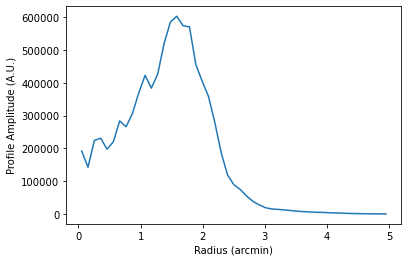

In [183]:
# %load solutions/solution_radial_profile.py
# flake8: noqa

# open image
image_hdu = fits.open('data/casa_1.5-3.0keV.fits.gz')['PRIMARY']
wcs = WCS(image_hdu.header)
image_data = image_hdu.data

# define position and integration radius
pos_casa = SkyCoord('23h23m27.94s', '+58d48m42.4s', frame='icrs')

# create an array of sky positions for each pixel
yp, xp = np.indices(image_data.shape)
sky_positions = SkyCoord.from_pixel(xp=xp, yp=yp, wcs=wcs)

# calculate separation image
separation = pos_casa.separation(sky_positions)

# initialize radius arrays
radii = np.linspace(0, 5, 50).reshape(-1, 1, 1) * u.arcmin
radii_min, radii_max = radii[:-1], radii[1:]

# mask out the annulus regions
mask = (separation > radii_min) & (separation < radii_max)

data_masked = mask * image_data.reshape(-1, 1024, 1024)
data_summed = data_masked.sum(axis=-1).sum(axis=-1)

radius_center = (radii_min[:, 0, 0] + radii_max[:, 0, 0]) / 2.

r_dr = radius_center * (radii_max - radii_min).squeeze()

with quantity_support():
    plt.plot(radius_center, data_summed / (2 * np.pi * r_dr))
    plt.xlabel('Radius (arcmin)')
    plt.ylabel('Profile Amplitude (A.U.)')

## 5. Plotting of sky images (optional)

The [Matplotlib](https://matplotlib.org/) package is a very popular plotting package for Python. Astropy provides a helper module [astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/) to simplify plotting of sky images with Matplotlib.

To use it we just pass `projection=wcs` to the `plt.subplot()` function:

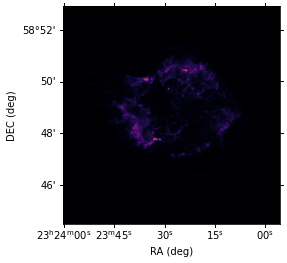

In [184]:
ax = plt.subplot(projection=wcs)
ax.imshow(image_hdu.data, cmap='inferno', origin='lower')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

And we get the plot with the x-axis and y-axis in sky coordinates. 

We can add a coordinate grid with `ax.grid()`:

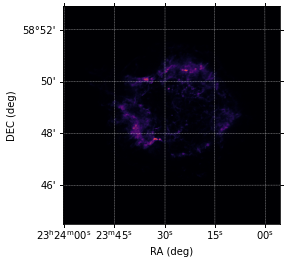

In [185]:
ax.grid(linewidth=0.3, linestyle='dashed', color='white')
ax.figure

We add a white cross to mark the center position of `'Cas A'`:

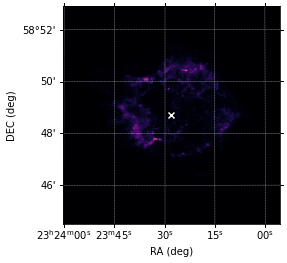

In [186]:
ra = position_casa.icrs.ra.deg
dec = position_casa.icrs.dec.deg
# the get_transform will transform the input from world to pixel coordinates before it is passed to matplotlib.
ax.scatter(ra, dec, transform=ax.get_transform('icrs'), color='white', marker='x')
ax.figure

We can also add geometrical shapes to the image to illustrate regions:

In [187]:
from matplotlib.patches import Circle
from astropy.wcs.utils import proj_plane_pixel_scales

In [188]:
# We convert the center position of CasA to pixel coordinated
xy = ax.wcs.world_to_pixel(position_casa)
#xy = position_casa.to_pixel(ax.wcs)
# Define the size of the circle in pixel
pixel_size = proj_plane_pixel_scales(wcs)[0] * u.deg
radius = 2.2 * u.arcmin / pixel_size

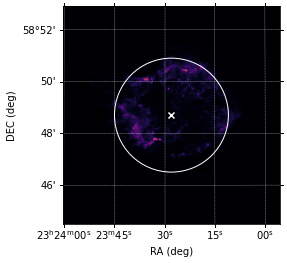

In [189]:
circle = Circle(
    xy=xy,
    radius=radius.to_value(""),
    edgecolor="w",
    facecolor="None"
)
ax.add_patch(circle)
ax.figure

For plotting more complex shapes and handling of regions in general incl. plotting there is an Astropoy affiliated package named [regions](https://astropy-regions.readthedocs.io/en/stable/).

### 5.1 Exercises

- (*easy*) Make a combined plot of the Chandra data for all energy bands side by side (one row, three columns)
and put the energy information in the title of the subplot. You can use e.g. `plt.subplot()` (check the matplotlib documentation).  


In [ ]:
# %load solutions/plot_combined_chandra_image.py
# flake8: noqa

# We define a figure size, that has an aspect ratio to accomodate three plots side by side
fig = plt.figure(figsize=(12, 3))
filenames = ['data/casa_0.5-1.5keV.fits.gz', 'data/casa_1.5-3.0keV.fits.gz',
             'data/casa_4.0-6.0keV.fits.gz']

# For convenience we use a Python loop here, but the same can be achieved
# by copy and pasting the code for one energy band
for idx, filename in enumerate(filenames):
    image_hdu = fits.open(filename)['PRIMARY']
    wcs = WCS(image_hdu.header)
    ax = plt.subplot(1, 3, idx + 1, projection=wcs)
    ax.imshow(image_hdu.data, origin='lower', cmap='afmhot')

    # We extract the energy range from the filename, by setting it "by hand" is also fine
    energy_range = filename[10:20]
    ax.set_title('Energy range: {}'.format(energy_range))

    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('DEC (deg)')

- (*advanced*) Make a combined RGB image of the Chandra data in different energy bands. Therefore you have to
renormalize the data per energy band to the maximum value of respective energy band and combine the data into a 3d array with a shape that is compatible with `plt.imshow()` (check the matplotlib documentation!). You can also try to experiment with the Astropy function [make_lupton_rgb](http://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html#astropy.visualization.make_lupton_rgb). For this you can find a [tutorial in the Astropy documentation](http://docs.astropy.org/en/stable/visualization/lupton_rgb.html).

"\n#To use the make_lupton_rgb astropy function\nfrom astropy.visualization import make_lupton_rgb\n\ndata_rgb=make_lupton_rgb(data_rgb[0],data_rgb[1],data_rgb[2], Q=0.1, stretch=1)\nplt.figure(figsize=(10, 10))\nax = plt.subplot(projection=wcs)\nax.imshow(data_rgb, origin='lower')\n\nax.set_xlabel('RA (deg)')\nax.set_ylabel('DEC (deg)')\n"

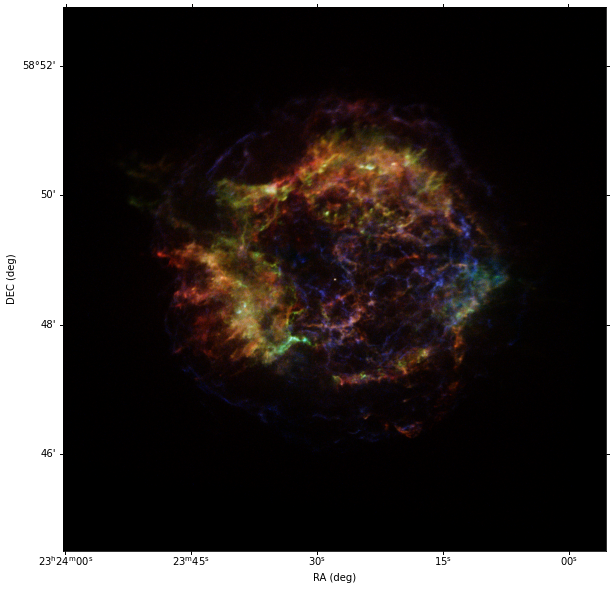

In [192]:
# %load solutions/solution_rgb_chandra_image.py
# flake8: noqa
from astropy.visualization import AsinhStretch

filenames = ['data/casa_0.5-1.5keV.fits.gz', 'data/casa_1.5-3.0keV.fits.gz',
             'data/casa_4.0-6.0keV.fits.gz']

# use asinh stretching to brighten up the image
stretch = AsinhStretch(0.1)

data_rgb = []

for filename in filenames:
    image_hdu = fits.open(filename)['PRIMARY']
    data = image_hdu.data
    data /= data.max()
    data = stretch(data)
    data_rgb.append(data)

data_rgb_stacked = np.stack(data_rgb, axis=2)

plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
ax.imshow(data_rgb_stacked, origin='lower')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

"""
#To use the make_lupton_rgb astropy function
from astropy.visualization import make_lupton_rgb

data_rgb=make_lupton_rgb(data_rgb[0],data_rgb[1],data_rgb[2], Q=0.1, stretch=1)
plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
ax.imshow(data_rgb, origin='lower')

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')
"""

## Acknowledgements
<img src="logo_escape.png" alt="drawing" width="400"/> This event is organized in the framework and with the support of the European Science Cluster of Astronomy & Particle physics ESFRI research infrastructures (ESCAPE), funded by the European Union's Horizon 2020 - Grant N. 824064.